In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p

In [2]:
features = pd.read_csv("features.csv")
store = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
#reseting train
train = train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train = train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [5]:
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [6]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
#merging train and feature
data = pd.merge(train, features, on=['Store','Date'], how='inner') 
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [8]:
#merging store with data
data = pd.merge(data, store, on=['Store'], how='inner') # data += store
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [9]:
#sorting values of Data
data = data.sort_values(by='Date')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,NaN,NaN,NaN,NaN,NaN,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350,False,A,203819


<Axes: xlabel='Type', ylabel='count'>

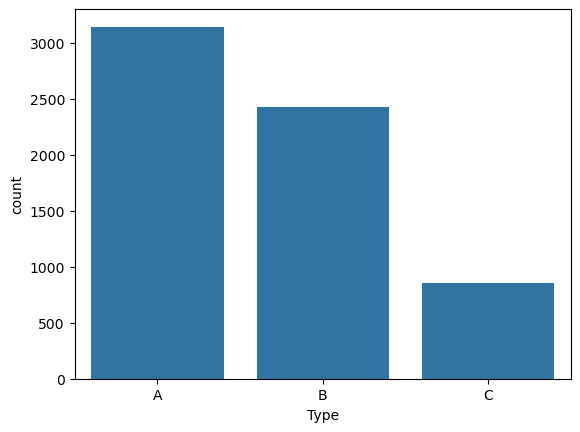

In [10]:
sns.countplot(x="Type", data=data)

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

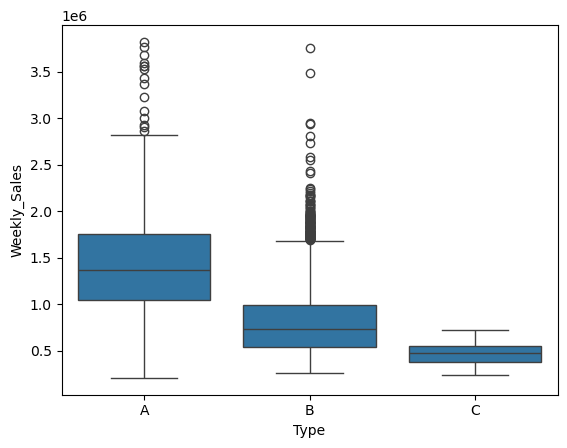

In [11]:
sns.boxplot(x='Type',y='Weekly_Sales', data=data)

<Axes: ylabel='Frequency'>

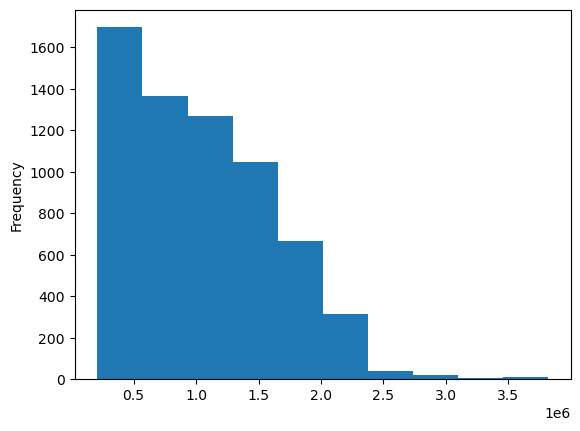

In [12]:
data["Weekly_Sales"].plot.hist()

<Axes: xlabel='IsHoliday', ylabel='count'>

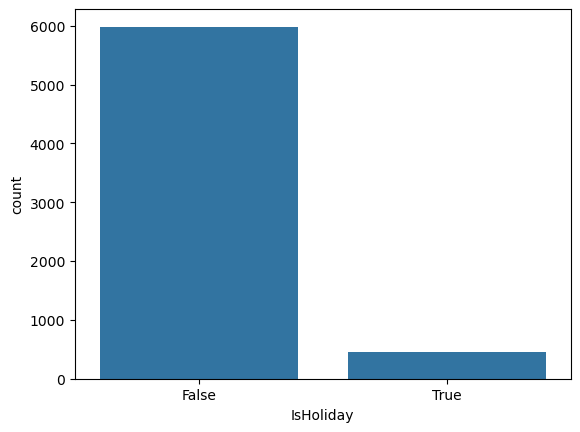

In [13]:
sns.countplot(x="IsHoliday", data=data)

<Axes: >

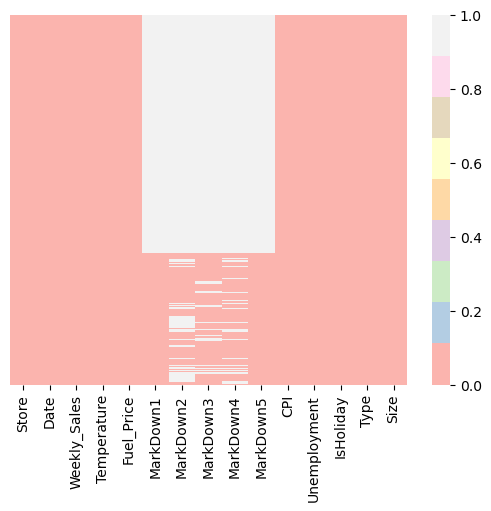

In [14]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="Pastel1")

In [15]:
data = data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819


In [17]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

<Axes: >

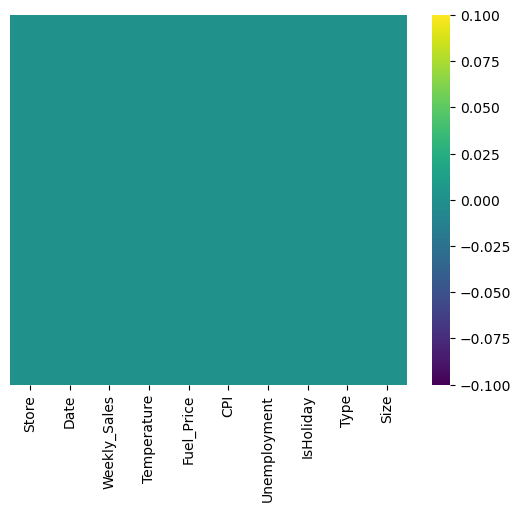

In [18]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis")

In [19]:
data['Holiday'] = [int(i) for i in list(data.IsHoliday)]
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0


In [20]:
Type_dummy = pd.get_dummies(data['Type'], drop_first = True)
Type_dummy.head(10)

,B,C
0,False,False
1287,True,False
5148,False,True
2288,True,False
4147,False,True
3432,True,False
3003,True,False
3146,True,False
3289,False,False
2574,False,False


In [21]:
data = pd.concat([data,Type_dummy],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,False,False
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,True,False
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,False,True
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,True,False
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,False,True
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0,True,False
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0,True,False
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0,True,False
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0,False,False
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0,False,False


In [22]:
data=data.drop(['Type','IsHoliday'],axis=1)
data.drop(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,False,False
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,True,False
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,False,True
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,True,False
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,True,False
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,True,False
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,False,False
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,True,False


In [23]:
#splitting data in input and output
X = data.drop(['Weekly_Sales','Store','Date'],axis=1)
y = data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

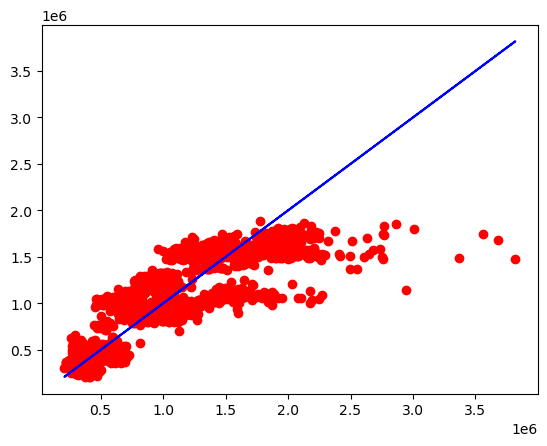

In [27]:
y_pred = LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [28]:
Root_mean_square_error = np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

317685.8437917589


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.6840791667800414
